<a href="https://colab.research.google.com/github/HumbertoSM-DataScience/Thermodynamics/blob/main/Trab2_Jogo_do_Qaunta/Lista_Termo_2_ATUALIZADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy.optimize import curve_fit

rng = np.random.default_rng()

In [ ]:
# Gera uma rede inicial e preenche conforme regras predefinidas
def rede_inicial(N,tipo,E0):
  grid = np.zeros((N,N),dtype=float)

  if tipo=='E0':  # preenche todos os espacos da rede com um mesmo valor de energia de E0
    grid[:][:] = E0

  if tipo=='i+j': # preenche todos os espacos da rede de acordo com sua posicao i,j , sendo o valor i+j
    for i in range(N):
      for j in range(N):
        grid[i][j] = i+j

  if tipo=='random': # um espaço aleatorio recebe toda energia do sistema
    i,j=rng.integers(0,N,size=2)
    grid[i][j] = N*N*E0

  return grid # Retorna uma rede de lado NxN com a distribuicao de energia desejada

In [ ]:
# TESTE DA FUNÇÃO rede_inicial()

# Gera as condicoes iniciais do sistema
N = 20  # lado da rede quadrada
E0 = 1  # quanta inicial por celula

grid = rede_inicial(N,'E0',E0)  

print(grid)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
  # Define a funcao de ajuste de boltzmann que sera usada no ajuste de curva no codigo a seguir
  def fit_boltzmann(x, a, b):
    return a * np.exp(-x*b)

In [ ]:
# Plota o grafico da distribuicao de quantas de energia e histogramas
def plotar(grid,fit=False,savefig=False):
  fig, ax = plt.subplots(1,3,figsize=(18,4),dpi=100)
  N = len(grid)
# Plota a imagem da distribuicao na rede
  ax[0].imshow(grid,'hot',aspect = 'auto',extent = (0,N,0,N))
  ax[0].set_xlabel(f'Energia total do sistema = {grid.sum()}')
  ax[0].tick_params(length=0)
  ax[0].set_xticks([0,N/2,N])
  ax[0].set_yticks([0,N/2,N])
  ax[0].set_aspect('equal')

  gridcbar = ax[0].imshow(grid,'hot',aspect = 'auto',extent = (0,N,0,N))
  cbar = fig.colorbar(gridcbar,ax=ax[0], orientation="vertical")
  cbar.set_label('Quanta por célula')

# Plota o histograma
  bins = range(int(grid.min()),int(grid.max())+2)
  hist = ax[1].hist(list(grid.reshape(1,N*N)),bins=bins,align='left',density=True,histtype='stepfilled')
  ax[1].set_xlabel('Quanta')
  ax[1].set_ylabel('Frequência relativa')
  ax[1].set_aspect('auto')


# Plota o histograma no formato semi-log
  x=hist[1][0:-1]
  y=hist[0]
  ymin=1

  ax[2].scatter(x,y,label='Dados')
  ax[2].set_yscale('log')
  ax[2].set_ylim(1e-3,1)
  ax[2].set_xlim(x.min(),x.max())
  ax[2].tick_params(direction='in',which='minor',length=5, width = 1 , right = 'on' , top = 'on')
  ax[2].tick_params(direction='in',length=10, width = 1 , right = 'on' , top = 'on')
  ax[2].set_xlabel('Quanta')
  ax[2].set_ylabel('Frequência relativa')
  ax[2].set_aspect('auto')
  
# Se ativado, faz o fit dos dados em uma funcao de boltzman a * exp(-x*b)  plota o resutado 
  if fit:
    popt, pcov = curve_fit(fit_boltzmann, x, y,p0=(0.5,0.5))
    a,b = popt
    ax[2].plot(x,fit_boltzmann(x,a,b),label=fr'$y = {a:.4f} * exp(-x*{b:.4f})$',c='k')
    ax[2].legend()
    if savefig:
      plt.savefig(f'NEG_lado_{N}_E0_{grid.sum()/(N*N)}.png',dpi=300)
    return x,y,(a,b)
  

  if savefig:
    plt.savefig(f'NEG_lado_{N}_E0_{grid.sum()/(N*N)}.png',dpi=300)


  pass
  return x,y


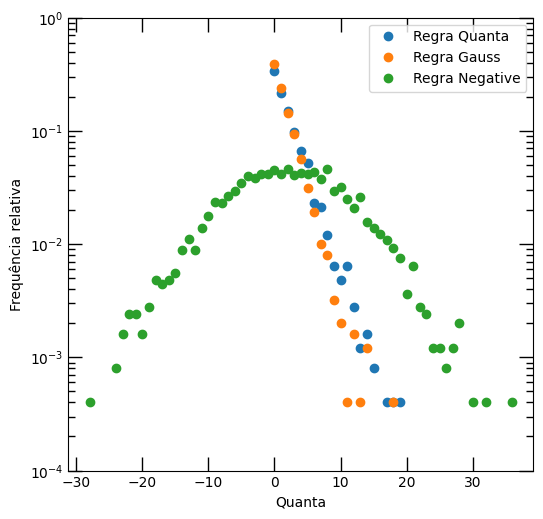

In [ ]:
# juntando as 3 maneiras de atualizar

N = 50 # tamanho da rede quadrada
E0 = 2 # quanta inicial por celula
n_it = 20*E0*N*N # Numero de iteracoes que a rede ira sofrer


grid = rede_inicial(N,'E0',E0)  
gridQ = atualizar(grid,n_it,negative=False,gauss=False)
grid = rede_inicial(N,'E0',E0)  
gridG = atualizar(grid,n_it,negative=False,gauss=True)
grid = rede_inicial(N,'E0',E0)  
gridN = atualizar(grid,n_it,negative=True,gauss=False)

x,y=[],[]
for i in [gridQ,gridG,gridN]:
  bins = range(int(i.min()),int(i.max())+2)
  hist = plt.hist(list(i.reshape(1,N*N)),bins=bins,align='left',density=True,histtype='stepfilled')
  plt.close()
  x.append(hist[1][0:-1])
  y.append(hist[0])

x,y

fig,ax=plt.subplots(figsize=(6,6),dpi=100)
ax.plot(x[0],y[0],'o',label='Regra Quanta')
ax.plot(x[1],y[1],'o',label='Regra Gauss')
ax.plot(x[2],y[2],'o',label='Regra Negative')
 
ax.set_yscale('log')
ax.set_ylim(1e-4,1)
#ax.set_xlim(x.min(),x.max())
ax.tick_params(direction='in',which='minor',length=5, width = 1 , right = 'on' , top = 'on')
ax.tick_params(direction='in',length=10, width = 1 , right = 'on' , top = 'on')
ax.set_xlabel('Quanta')
ax.set_ylabel('Frequência relativa')
ax.set_aspect('auto')
ax.legend()
plt.savefig(f'TRES_lado_{N}_E0_{grid.sum()/(N*N)}.png',dpi=100)

In [ ]:
y

[array([0.00250627, 0.0075188 , 0.0075188 , 0.01253133, 0.01754386,
        0.02756892, 0.02756892, 0.04761905, 0.07769424, 0.09273183,
        0.0802005 , 0.08521303, 0.10526316, 0.10526316, 0.06766917,
        0.05012531, 0.04761905, 0.04010025, 0.04260652, 0.02255639,
        0.01253133, 0.00501253, 0.00501253, 0.00501253, 0.00250627,
        0.00250627]),
 array([0.00250627, 0.0075188 , 0.0075188 , 0.01253133, 0.01754386,
        0.02756892, 0.02756892, 0.04761905, 0.07769424, 0.09273183,
        0.0802005 , 0.08521303, 0.10526316, 0.10526316, 0.06766917,
        0.05012531, 0.04761905, 0.04010025, 0.04260652, 0.02255639,
        0.01253133, 0.00501253, 0.00501253, 0.00501253, 0.00250627,
        0.00250627]),
 array([0.00250627, 0.0075188 , 0.0075188 , 0.01253133, 0.01754386,
        0.02756892, 0.02756892, 0.04761905, 0.07769424, 0.09273183,
        0.0802005 , 0.08521303, 0.10526316, 0.10526316, 0.06766917,
        0.05012531, 0.04761905, 0.04010025, 0.04260652, 0.02255639,
    

array([0.1032, 0.0784, 0.0752, 0.068 , 0.06  , 0.0536, 0.0544, 0.048 ,
       0.0516, 0.0308, 0.0336, 0.042 , 0.0308, 0.0236, 0.0296, 0.0208,
       0.02  , 0.0164, 0.0104, 0.016 , 0.0096, 0.0116, 0.0124, 0.0084,
       0.0076, 0.0068, 0.0056, 0.0064, 0.008 , 0.004 , 0.0048, 0.008 ,
       0.0048, 0.0036, 0.0052, 0.004 , 0.002 , 0.0028, 0.0028, 0.0008,
       0.0016, 0.002 , 0.    , 0.0016, 0.0008, 0.0012, 0.0008, 0.0004,
       0.    , 0.    , 0.0008, 0.    , 0.0008, 0.    , 0.0004, 0.0008,
       0.0008, 0.    , 0.0004, 0.    , 0.0008, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.0004, 0.    , 0.0004, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0004])

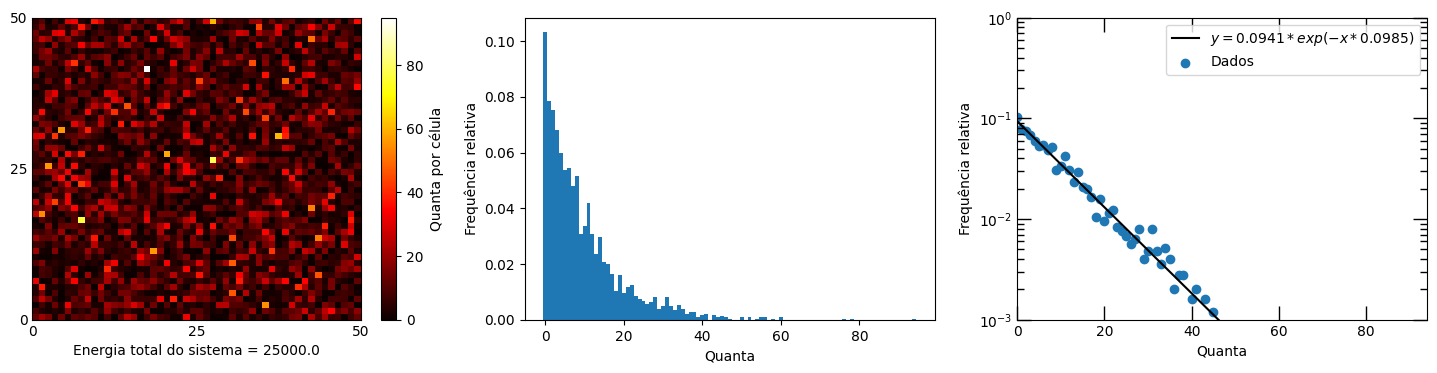

In [ ]:
# TESTE DA FUNÇÃO plotar()
x,y,c= plotar(grid,fit=True,savefig=False)
y

In [ ]:
# Atualiza os valores das celulas pelas regras definidas no roteiro
def atualizar(grid,n_it,gauss=False,negative=False): 
  for count in range(n_it):
    if negative:  # Caso o argumento negative=True a funcao atualizar() podera tirar quanta de celulas com energias menor que 1
      i,j=rng.integers(0,N,size=2)
    else: # Caso negative=False, a finção ira testar se a celula tem energia >0 antes de retirar um quanta, caso seja <0 ira sortear outra celula 
      sucesso=False
      while sucesso==False:  #testa se uma celula aleatoria tem mais de 0 quanta de energia
        i,j=rng.integers(0,N,size=2)
        if grid[i][j] > 0:
          sucesso=True

    if gauss: # Caso gauss=True a funcao atualizar() ira sortear um valor baseado em uma gaussiana para ser removido e acrescido das celulas
      q=abs(np.random.normal(grid[i][j]/2,0.1))
      if q>grid[i][j]: q= grid[i][j]
    else: # Caso gauss=False a funcao assume que um quanta de energia sera retirado e adicionado a outra celula
      q=1

    grid[i][j] -=q
    i,j=rng.integers(0,N,size=2)   # Sorteia novos valores de i,j
    grid[i][j] +=q

  return grid # Retorna uma grid modificada pela funcao

In [ ]:
# TESTE DA FUNÇÃO atualizar()
N = 20 # tamanho da rede quadrada
E0 = 10 # quanta inicial por celula
n_it = 20*E0*N*N # Número de iteracoes que a rede ira' sofrer

grid = rede_inicial(N,'E0',E0)
grid = atualizar(grid,n_it,gauss=False,negative=False)
print('Formato de grid de saída',grid.shape,'Soma dos valores de energia' ,grid.sum(),'\nGrid:\n',grid)

Formato de grid de saída (20, 20) Soma dos valores de energia 4000.0 
Grid:
 [[18.  1. 28. 11. 11.  3. 14.  5. 10. 25.  9. 36. 10.  4.  3.  3.  2.  0.
  15. 14.]
 [ 6. 14.  0.  1.  6.  5.  5.  7. 36.  6.  4.  6.  0. 15.  2. 12.  0.  7.
  16. 14.]
 [ 3.  5. 11. 23. 17. 10. 27. 11. 12. 30.  8. 21. 12. 10. 48.  0.  3.  1.
   1.  9.]
 [13. 18.  0. 11. 14.  0.  5.  0. 26. 15. 10. 14.  0.  7. 16.  0.  1.  8.
   0.  2.]
 [ 0.  3.  2.  3.  4.  0. 22. 28.  8.  3.  8. 10. 14.  3.  6.  5.  1. 16.
   4.  8.]
 [ 7. 17. 10. 10. 16. 19.  0.  4. 10.  1. 23. 14.  1.  3.  0. 19.  4. 15.
   2. 22.]
 [ 9. 22.  0.  1. 16.  0.  6.  2.  3. 14.  3.  3. 16. 20. 46. 17.  1.  5.
   2. 14.]
 [ 1.  1.  0.  1.  0. 19. 17. 11. 17.  3. 18. 14.  4. 17. 21. 10.  0. 22.
  17.  1.]
 [ 1.  7.  7.  0.  0.  5.  5. 14. 12. 11. 11.  4.  6.  9.  7.  8.  7.  3.
   7. 19.]
 [29. 18.  3.  5. 12.  0.  2. 44. 13.  1.  8.  3. 14. 29.  9.  5.  7.  3.
  22.  1.]
 [31. 23. 10.  4.  0. 14. 13. 38. 25.  1.  4.  6.  8.  1.  6.  5.  1.  6.

(0.09410386027990318, 0.09851378710825902)

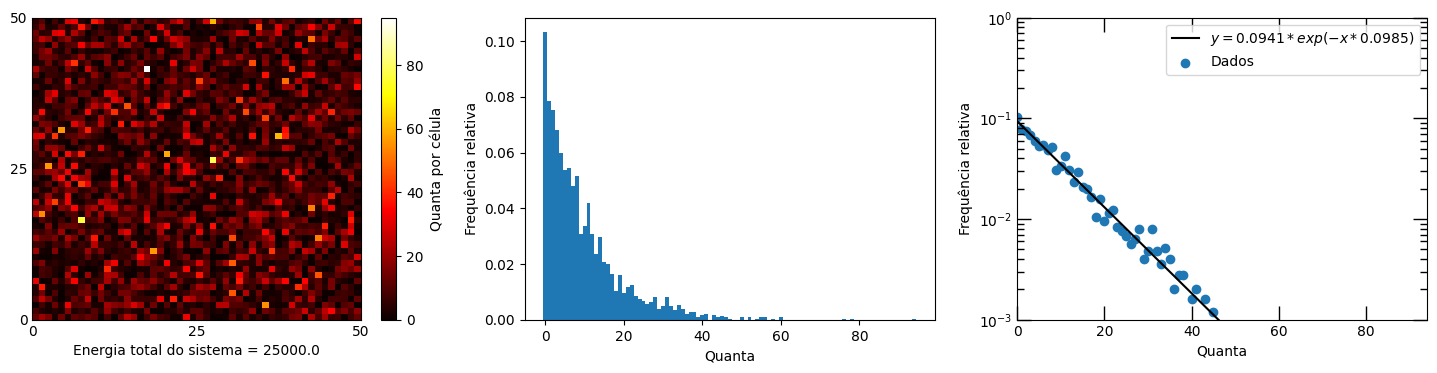

In [ ]:
# Este bloco de codigo junta as tres funções definidas anteriormente, podemos escolher os parametros e recebemos os resultados

N = 50 # tamanho da rede quadrada
E0 = 10 # quanta inicial por celula
n_it = 10*E0*N*N # Numero de iteracoes que a rede ira sofrer

grid = rede_inicial(N,'E0',E0)  
grid = atualizar(grid,n_it,negative=False,gauss=True)
x,y,c = plotar(grid,fit=True,savefig=True)
c

In [ ]:
# Este bloco de codigo realiza um 'experimento' , realizando a simulacao definida anteriormente deiversas vezes (variavel 'repeticoes'), e coletando o valor medios dos resultados
def experimento(N,E0,repeticoes,fit=True,savefig=False):
  fig, ax = plt.subplots(1,1,figsize=(8,8),dpi=100)
  ajuste = []
  for e0 in E0:
    n_it = 20*e0*N*N
    y_tot=np.zeros(100)
    x_max=np.zeros(1)
    for i in range(repeticoes): # Rodamos as tres funções pelo numero de repeticoes definido 
      grid = rede_inicial(N,'E0',e0)  
      grid = atualizar(grid,n_it)
      x,y = plotar(grid)
      plt.close()
      for j,k in enumerate(y): # Os histogramas sao gerados e somados a cada repeticao
        y_tot[j]+=k
      if len(x) > len(x_max): # Garante que o valor em x do histograma será igual ao maior valor de x das repeticoes
        x_max=x
    y_final=y_tot[0:len(x_max)]/repeticoes # Divide o resultado obtido pelo numero de repeticoes para obeter a media

  # Plotamos o grafico semi-log do resultado obtido e fazemos o ajuste de curva pela funcao de Boltzmann e salvamos a imagem, o codigo e' igual ao definido na funcao plotar()
    ax.scatter(x_max,y_final,label=f'Dados E0 = {e0}')
    if fit:
      popt, pcov = curve_fit(fit_boltzmann, x_max, y_final,p0=(0.5,0.5))
      a,b = popt
      ax.plot(x_max,fit_boltzmann(x_max,a,b),label=f'Ajuste E0={e0}')
      T = (1/(b))
      ajuste.append((N,e0,a,b,T))

  # Propriedades da figura
  ax.legend()
  ax.set_yscale('log')
  ax.set_ylim(1e-3,1)
  ax.set_xlim(x_max.min(),50)
  ax.tick_params(direction='in',which='minor',length=5, width = 1 , right = 'on' , top = 'on')
  ax.tick_params(direction='in',length=10, width = 1 , right = 'on' , top = 'on')
  ax.set_xlabel('Quanta')
  ax.set_ylabel('Frequência Relativa')
  if savefig:
    plt.savefig(f'N_{N}_E0_{e0}_n_it_{n_it}_repeticoes_{repeticoes}.png',dpi=300)


  return y_final,x_max,ajuste # Retorna o grafico e os valores finais de y e x do histograma


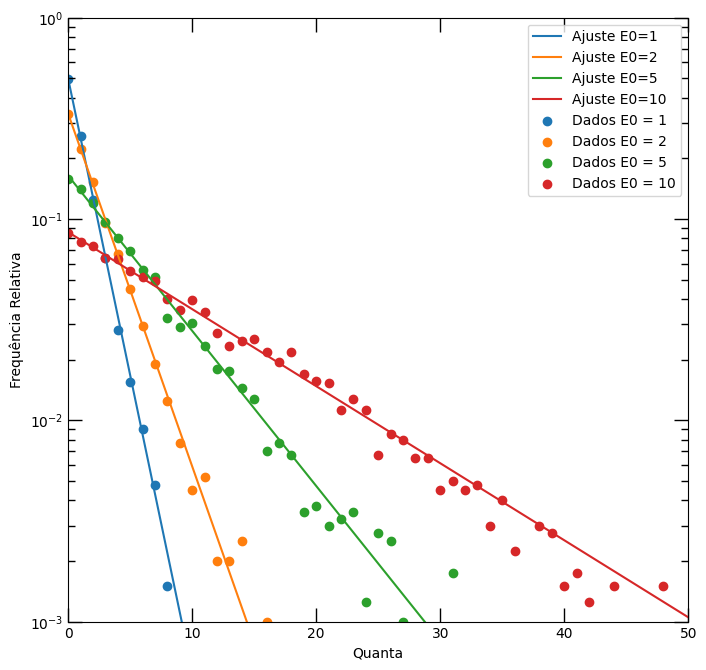

In [ ]:
#TESTE DA FUNCAO experimento()

N = 20 # tamanho da rede quadrada
E0 = [1,2,5,10] # quanta inicial por espaço
#n_it = 10*e0*N*N # Numero de iteracoes que a rede ira' sofrer
repeticoes=10

y,x,ajuste = experimento(N,E0,repeticoes,savefig=True)


In [ ]:
ajuste

[(20, 1, 0.4955823425311841, 0.6780722932993565, 1.4747690030722407),
 (20, 2, 0.33244237577162006, 0.40325198052340017, 2.4798390294377524),
 (20, 5, 0.16381696049896396, 0.1773993575198439, 5.636998994701207),
 (20, 10, 0.08595534082369743, 0.08808754087327404, 11.35234324952534)]

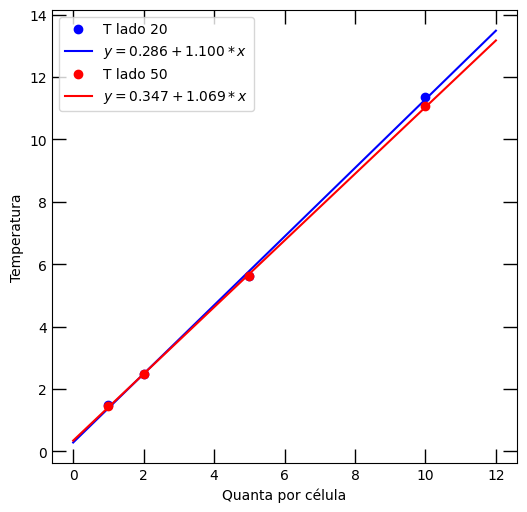

In [ ]:
dados20 = [(20, 1, 0.4955823425311841, 0.6780722932993565, 1.4747690030722407),
 (20, 2, 0.33244237577162006, 0.40325198052340017, 2.4798390294377524),
 (20, 5, 0.16381696049896396, 0.1773993575198439, 5.636998994701207),
 (20, 10, 0.08595534082369743, 0.08808754087327404, 11.35234324952534)]
dados50 = [(50, 1, 0.49737494752346273, 0.6834202659125916, 1.4632284845470158),
 (50, 2, 0.3326119748751181, 0.40393217676906434, 2.475663137308615),
 (50, 5, 0.16394284553845295, 0.17794585859318657, 5.619686841300219),
 (50, 10, 0.08742895069881995, 0.09035792496870305, 11.067097881523578)]

x,y=[],[]
fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=100)
xx = np.linspace(0,12,1000)

def linha(x,a,b):
  return a+b*x


for N, E0 , a , b , T in dados20:
  x.append(E0)
  y.append(T)
ax.plot(x,y,'ob',label='T lado 20')
popt, pcov = curve_fit(linha,x, y,p0=(0.5,0.5))
a,b=popt
ax.plot(xx,linha(xx,a,b),'b',label = f'$y={a:.3f}+{b:.3f}*x$')

x,y=[],[]
for N, E0 , a , b , T in dados50:
  x.append(E0)
  y.append(T)
ax.plot(x,y,'or',label='T lado 50')
popt, pcov = curve_fit(linha,x, y,p0=(0.5,0.5))
a,b=popt
ax.plot(xx,linha(xx,a,b),'r',label = f'$y={a:.3f}+{b:.3f}*x$')

#ax.set_yscale('log')
#ax.set_ylim(1e-3,1)
#ax.set_xlim(x_max.min(),50)
ax.tick_params(direction='in',which='minor',length=5, width = 1 , right = 'on' , top = 'on')
ax.tick_params(direction='in',length=10, width = 1 , right = 'on' , top = 'on')
ax.set_xlabel('Quanta por célula')
ax.set_ylabel('Temperatura')
ax.legend()

plt.savefig(f'parametros.png',dpi=300)